In [ ]:
#Importing libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout

In [ ]:
#Reading dataset
data = pd.read_csv("thyroidDF.csv")
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data.shape

(9172, 31)

In [ ]:
#DATA PRE-PROCESSING
#Checking the null value
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
#Removing Redundant attributes from dataset
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'],axis=1, inplace=True)

In [ ]:

data['target']

0       -
1       -
2       -
3       -
4       S
       ..
9167    -
9168    -
9169    I
9170    -
9171    -
Name: target, Length: 9172, dtype: object

In [ ]:
#Re-mapping target values to diagnostic group
diagnoses  = {'A': 'hyperthyroid conditions',
         'B': 'hyperthyroid conditions',
         'C': 'hyperthyroid conditions',
         'D': 'hyperthyroid conditions',
         'E': 'hyperthyroid conditions',
         'F': 'hyperthyroid conditions',
         'G': 'hyperthyroid conditions',
         'H': 'hyperthyroid conditions',
           'I' : 'binding protein',
                 'J' : 'binding protein',
               'K' : 'general health',
         'L' : 'replacement theraphy',
         'M' : 'replacement theraphy',
         'N' : 'replacement theraphy',
         'O' : 'antithyroid treatment',
         'P' : 'antithyroid treatment',
         'Q' : 'antithyroid treatment',
         'R' : 'miscellanous',
         'S' : 'miscellanous',
         'T' : 'miscellanous'}
data['target'] = data['target'].map(diagnoses)

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,NaN
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,NaN
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,NaN
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellanous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,NaN
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,NaN
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,binding protein
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,NaN


In [ ]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
target                 6935
dtype: int64

In [ ]:
# Dropping null values
data.dropna(subset=['target'],inplace=True)
data['target'].value_counts()

hyperthyroid conditions    775
general health             436
binding protein            376
replacement theraphy       336
miscellanous               281
antithyroid treatment       33
Name: target, dtype: int64

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellanous
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hyperthyroid conditions
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellanous
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement theraphy


In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2237.000000,2087.000000,1643.000000,2140.000000,2059.000000,2060.000000,98.000000
mean,52.792579,14.930791,1.961875,116.390495,1.013439,120.363369,47.717347
std,19.677450,46.204092,1.452238,60.351600,0.280222,70.996728,32.398750
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,9.299999
25%,36.000000,0.255000,1.000000,76.000000,0.850000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.000000,0.960000,109.000000,36.000000
75%,69.000000,8.799999,2.500000,156.000000,1.120000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [ ]:
#Checking whether the age above 100
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [ ]:
data['age']=np.where((data.age>100), np.nan, data.age)

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellanous
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hyperthyroid conditions
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellanous
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement theraphy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN,general health
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN,general health
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN,binding protein
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN,binding protein


In [ ]:
#Splittting the data values as X and Y
x=data.iloc[:,0:-1]
y = data.iloc[:, -1]

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [ ]:
data.isnull().sum()

age                       0
sex                      90
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2139
target                    0
dtype: int64

In [ ]:
#Making 'F' on wherever we have the 'nan' values on data
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
x['sex'].replace(np.nan, 'F', inplace=True)

In [ ]:
x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [ ]:
x.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2139
dtype: int64

In [ ]:
#Checking the datatype information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [ ]:
#Converting the object values into float values
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

In [ ]:
#applying ordinal_encoding to x values
#Encoding the categorical data
#Encoding the independent(output) variable
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
#categorical data


ordinal_encoder = OrdinalEncoder(dtype = 'int64')
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
#ordinal_encoder.fit_transform(x[['sex']])

<ipython-input-25-59265e3e7c5c>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
#Selecting Output Columns
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,NaN,NaN,44.0,0.53,83.0,NaN
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,84.0,1.26,67.0,NaN


In [ ]:
#Replacing the nan values with zero (0) values
x.replace(np.nan, '0', inplace=True)
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.81,0,31.0,0.55,56.0,0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.18,0,28.0,0.87,32.0,0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,44.0,0.53,83.0,0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,84.0,1.26,67.0,0


In [ ]:
#applying label_encoding to y values
label_encoder = LabelEncoder()
y_dt= label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt, columns=['target'])
y

,target
0,4
1,3
2,4
3,1
4,5
...,...
2232,2
2233,2
2234,1
2235,1


In [ ]:
y.value_counts(normalize=True)

target
3         0.346446
2         0.194904
1         0.168082
5         0.150201
4         0.125615
0         0.014752
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
y_train.value_counts()

target
3         615
2         351
1         302
5         265
4         230
0          26
dtype: int64

In [ ]:
#Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [ ]:
#Appling StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_test_bal= sc.transform(x_test_bal)

In [ ]:
x_bal

array([[-1.61400329, -0.42164543, -0.45764564, ..., -2.42387322,
        -1.44361817,  2.88735696],
       [-0.11257649, -0.42164543,  2.18509677, ..., -0.26728147,
         0.23652483, -0.20806903],
       [ 1.18175696,  2.37166093, -0.45764564, ...,  0.14844706,
        -0.06645178, -0.20806903],
       ...,
       [-0.06330731, -0.42164543,  2.18509677, ...,  0.50969605,
         0.80182915, -0.20806903],
       [-1.58523289, -0.42164543,  2.18509677, ..., -0.13241395,
         0.99134148, -0.20806903],
       [ 0.87355885, -0.42164543,  2.18509677, ..., -0.04951419,
         1.62286358, -0.20806903]])

In [ ]:
#Making data in array formate to dataframe(table formate)
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium', 'goitre', 'tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']

In [ ]:
x_test_bal= pd.DataFrame(x_test_bal,columns= columns)

In [ ]:
x_bal= pd.DataFrame(x_bal,columns=columns)

In [ ]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-1.614003,-0.421645,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.328415,-1.117160,-1.710404,-2.423873,-1.443618,2.887357
1,-0.112576,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.095125,0.392630,-0.071301,-0.267281,0.236525,-0.208069
2,1.181757,2.371661,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.290584,-0.401996,-0.103759,0.148447,-0.066452,-0.208069
3,-1.355137,-0.421645,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,8.205689,-0.023287,-0.102006,-0.296889,1.425644,0.188359,0.460243,0.002407,-0.208069
4,-0.164350,-0.421645,-0.457646,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.318957,5.955015,1.730089,-0.137366,1.861581,-0.208069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,-1.116733,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.323679,-0.224536,1.707446,0.507383,1.132318,-0.208069
3686,0.241020,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.327047,1.327591,1.584375,0.424308,1.106777,-0.208069
3687,-0.063307,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.319532,-0.159140,1.265608,0.509696,0.801829,-0.208069
3688,-1.585233,-0.421645,2.185097,-0.099258,-0.16256,-0.135989,-0.137019,-0.256628,-0.165175,-0.227775,...,-0.049447,-0.121867,-0.023287,-0.102006,-0.321119,-0.333842,0.818448,-0.132414,0.991341,-0.208069


In [ ]:
#MODEL BUILDING
#TRAINING THE MODEL IN MULTIPLE ALGORITHMS
#Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rfr = RandomForestClassifier().fit(x_bal,y_bal)
y_pred = rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape

<ipython-input-40-3fa35abcbfd7>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestClassifier().fit(x_bal,y_bal)


((3690, 22), (3690, 1), (960, 22), (960, 1))

In [ ]:
#perform feature importance
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr,x_bal,y_bal, scoring='accuracy')

feature: age                  Score: 0.0
feature: sex                  Score: 0.0
feature: on_thyroxine         Score: 0.0
feature: query_on_thyroxine   Score: 0.0
feature: on_antithyroid_meds  Score: 0.0
feature: sick                 Score: 5.420054200542257e-05
feature: pregnant             Score: 5.420054200542257e-05
feature: thyroid_surgery      Score: 0.00021680216802169027
feature: I131_treatment       Score: 0.0008130081300813385
feature: query_hypothyroid    Score: 0.001300813008130053
feature: query_hyperthyroid   Score: 0.0015718157181571434
feature: lithium              Score: 0.0018428184281842563
feature: goitre               Score: 0.006991869918699179
feature: tumor                Score: 0.011653116531165297
feature: hypopituitary        Score: 0.01701897018970191
feature: psych                Score: 0.05555555555555556
feature: TSH                  Score: 0.06249322493224933
feature: T3                   Score: 0.0837940379403794
feature: TT4                  Score: 0.

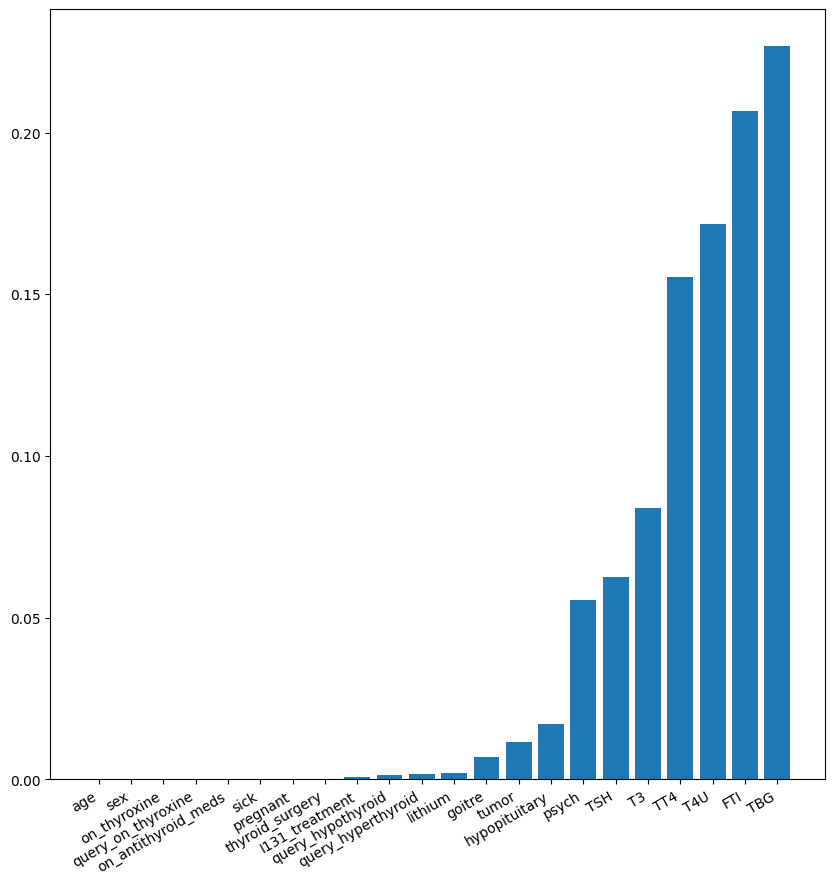

In [ ]:
#gets importance
feature_importance=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium', 'goitre', 'tumor','hypopituitary','psych','TSH','T3','TT4','T4U','FTI','TBG']
importance = results.importances_mean
importance = np.sort(importance)
#summerize feature importance
for i,v in enumerate(importance):
    i=feature_importance[i]
    print('feature: {:<20} Score: {}'. format(i,v))
#plot important feature

plt.figure(figsize=(10,10))
plt.bar(x=feature_importance, height = importance)
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0


In [ ]:
x_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1,inplace=True)

In [ ]:
x_test_bal.drop(['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium'],axis=1,inplace=True)

In [ ]:
x_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.049447,-0.121867,-0.023287,-0.102006,-0.328415,-1.117160,-1.710404,-2.423873,-1.443618,2.887357
1,-0.049447,-0.121867,-0.023287,-0.102006,-0.095125,0.392630,-0.071301,-0.267281,0.236525,-0.208069
2,-0.049447,-0.121867,-0.023287,-0.102006,-0.290584,-0.401996,-0.103759,0.148447,-0.066452,-0.208069
3,-0.049447,8.205689,-0.023287,-0.102006,-0.296889,1.425644,0.188359,0.460243,0.002407,-0.208069
4,-0.049447,-0.121867,-0.023287,-0.102006,-0.318957,5.955015,1.730089,-0.137366,1.861581,-0.208069


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

<ipython-input-48-af4004b0f90d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


<Axes: >

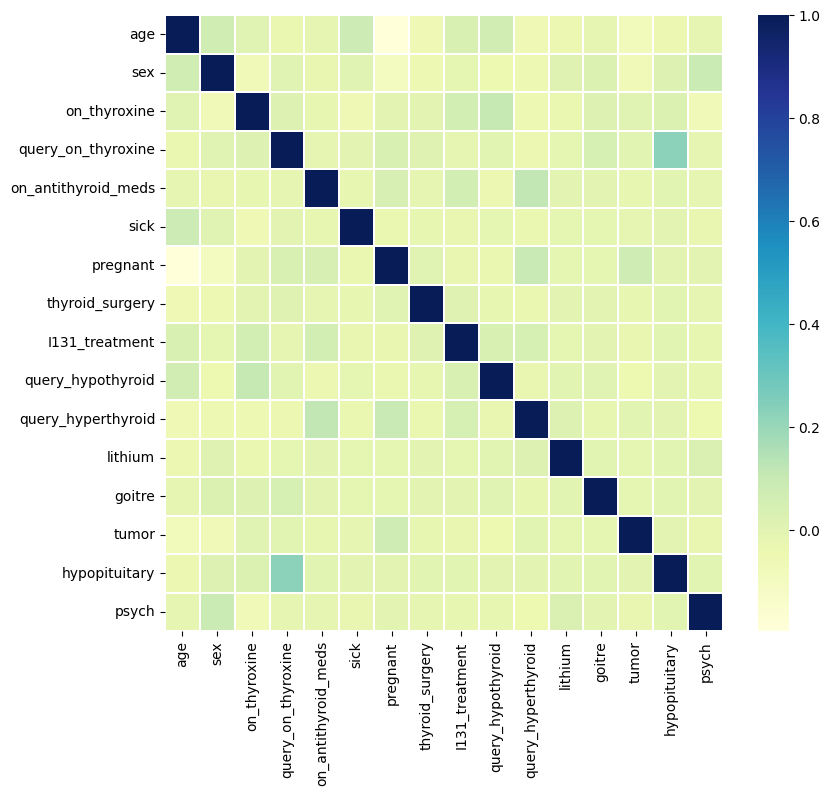

In [ ]:
#checking correlation using Heatmap
import seaborn as sns
corrmat = x.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rfr = RandomForestClassifier().fit(x_bal,y_bal.values.ravel())
y_pred = rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape

In [ ]:
rfr.fit(x_bal, y_bal.values.ravel())

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
test_score=accuracy_score(y_test_bal,y_pred)
test_score

In [ ]:
train_score = accuracy_score(y_bal,rfr.predict(x_bal))
train_score

In [ ]:
#XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_bal,y_bal)

In [ ]:
y_pred=xgb.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
accuracy_score(y_test_bal,y_pred)


In [ ]:
#SVC model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
sv= SVC()

In [ ]:
sv.fit(x_bal,y_bal)

In [ ]:
y_pred = sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units = 128, activation='relu', input_shape=(10,)))

In [ ]:
model.add(Dense(units = 128, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 256, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation='relu', kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_bal,y_bal, validation_data=[x_test_bal, y_test_bal], epochs=15)

In [ ]:
rfr.predict([[0,0,0,0,0.00000,0.0,0.0,1.00,0.0,40.0]])

In [ ]:
sv.predict([[0,0,0,0,0.00000,0.0,0.0,1.00,0.0,40.0]])

In [ ]:
col = ['goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4','T4U', 'FTI', 'TBG']
da = [[0,0,0,0,0.00000,0.0,0.0,1.00,0.0,40.0]]
da1 = pd.DataFrame(data = da, columns=col) 
xgb.predict(da1)

In [ ]:
model.predict([[0,0,0,0,0.00000,0.0,0.0,1.00,0.0,40.0]])

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score = accuracy_score(y_bal, rfr.predict(x_bal))

In [ ]:
train_score


In [ ]:
y_pred=xgb.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score = accuracy_score(y_bal, xgb.predict(x_bal))
train_score

In [ ]:
y_pred= sv.predict(x_test_bal)


In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score = accuracy_score(y_bal, sv.predict(x_bal))
train_score

In [ ]:
y_pred= model.predict(x_test_bal)


In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
accuracy_score(y_test_bal,y_pred)


In [ ]:
params={
   'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth' : [x for x in range(1,20)]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rfr, params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}

In [ ]:
rfr_gs=RandomForestClassifier(criterion= 'entropy', max_depth=16, n_estimators= 200)

In [ ]:
rfr_gs.fit(x_bal, y_bal)

<ipython-input-91-9d9e92e85fd9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_gs.fit(x_bal, y_bal)


RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=200)

In [ ]:
y_pred=rfr_gs.predict(x_test_bal)

In [ ]:
#COMPARE THE MODEL
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.17      0.29       160
           1       0.88      0.94      0.91       160
           2       0.92      0.99      0.96       160
           3       0.43      0.85      0.57       160
           4       0.84      0.68      0.75       160
           5       0.62      0.54      0.58       160

    accuracy                           0.70       960
   macro avg       0.76      0.70      0.68       960
weighted avg       0.76      0.70      0.68       960



In [ ]:
train_score= accuracy_score(y_bal,rfr_gs.predict(x_bal))
train_score

0.9994579945799458

In [ ]:
params={
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
   
    
    
}

In [ ]:
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy',cv=3,n_jobs=-1)

In [ ]:
grid_xgb.fit(x_bal, y_bal)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
grid_xgb.best_params_

{'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500}

In [ ]:
xgb1=XGBClassifier(booster='gbtree', gamma= 0, learning_rate= 0.1, n_estimators= 500)

In [ ]:
xgb1.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred= xgb1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.41      0.56       160
           1       0.88      0.93      0.90       160
           2       0.92      1.00      0.96       160
           3       0.50      0.82      0.62       160
           4       0.82      0.72      0.77       160
           5       0.60      0.54      0.57       160

    accuracy                           0.74       960
   macro avg       0.77      0.74      0.73       960
weighted avg       0.77      0.74      0.73       960



In [ ]:
train_score= accuracy_score(y_bal,xgb1.predict(x_bal))
train_score

1.0

In [ ]:
params = {
    'C' : [0.01, 0.1, 1, 10,100, 1000],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

In [ ]:
grid_svc = GridSearchCV(sv,params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
sv1=SVC(C =1000,gamma=1, kernel= 'rbf')


In [ ]:
sv1.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, gamma=1)

In [ ]:
y_pred= sv1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.47      0.62       160
           1       0.81      0.90      0.85       160
           2       0.92      0.91      0.92       160
           3       0.49      0.75      0.59       160
           4       0.84      0.61      0.71       160
           5       0.49      0.53      0.51       160

    accuracy                           0.70       960
   macro avg       0.74      0.70      0.70       960
weighted avg       0.74      0.70      0.70       960



In [ ]:
train_score= accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.9555555555555556

In [ ]:
params = {
    'C' : [0.01, 0.1, 1, 10,100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf', 'sigmoid']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_svc = RandomizedSearchCV(sv,params, scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
random_svc.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'sigmoid']},
                   scoring='accuracy')

In [ ]:
random_svc.best_params_


{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}

In [ ]:
sv1=SVC(kernel= 'rbf',gamma=0.1, C= 100)

In [ ]:
sv1.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.1)

In [ ]:
y_pred= sv1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       160
           1       0.83      0.90      0.86       160
           2       0.93      0.93      0.93       160
           3       0.57      0.68      0.62       160
           4       0.75      0.71      0.73       160
           5       0.61      0.53      0.57       160

    accuracy                           0.74       960
   macro avg       0.74      0.74      0.74       960
weighted avg       0.74      0.74      0.74       960



In [ ]:
train_score= accuracy_score(y_bal,sv1.predict(x_bal))
train_score

0.8227642276422764

In [ ]:
#sAVIVG THE MODEL AS THYROID1_MODEL.PKL
#Saving the model
import pickle
pickle.dump(xgb1,open('thyroid_1_model.pkl','wb'))

In [ ]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])
print(label_encoder.inverse_transform(xgb1.predict(features)))

['hyperthyroid conditions']


In [ ]:
type(features)

numpy.ndarray

In [ ]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [ ]:
data['target'].unique()

array(['miscellanous', 'hyperthyroid conditions', 'binding protein',
       'replacement theraphy', 'general health', 'antithyroid treatment'],
      dtype=object)

In [ ]:
y['target'].unique()


array([4, 3, 1, 5, 2, 0])

In [ ]:
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))